This notebook demonstrates the use of the `FilterWheel` in Scopesim. The METIS configuration contains two instances of this effect, named `filter_wheel` (for science filters) and `nd_filter_wheel` (for neutral-density filters). Each filter wheel contains a number of predefined filters, with different filter sets for the LM- and N-band imagers. 

In [1]:
import numpy as np
from matplotlib import pyplot as plt

import scopesim as sim
sim.bug_report()

# Edit this path if you have a custom install directory, otherwise comment it out.
sim.link_irdb("../../../../")

Python:
3.10.18 (main, Jun  5 2025, 13:08:10) [GCC 11.2.0]

Installed Python packages:
           anisocado: 0.3.0
         astar-utils: 0.3.3
             astropy: 6.1.7
      beautifulsoup4: 4.13.4
            docutils: 0.19
               httpx: 0.28.1
                lxml: 5.4.0
          matplotlib: 3.10.5
      more-itertools: 10.7.0
               numpy: 1.26.4
           packaging: 25.0
               pooch: 1.8.2
              pyyaml: 6.0.2
               scipy: 1.15.3
            scopesim: 0.10.0
       scopesim_data: could not be loaded.
  scopesim_templates: could not be loaded.
         skycalc-ipy: 0.5.3
             synphot: 1.6.0
                tqdm: 4.67.1

Installed IRDB packages:
  Armazones: 2023-07-11
        ELT: 2025-06-30
      METIS: 2025-06-30

Operating System info:
   System: Linux
  Release: 6.12.13-200.fc41.aarch64
  Version: #1 SMP PREEMPT_DYNAMIC Sat Feb  8 20:30:50 UTC 2025
  Machine: aarch64


If you haven't got the instrument packages yet, uncomment the following cell.

In [ ]:
# sim.download_packages(["METIS", "ELT", "Armazones"])

In [2]:
cmd = sim.UserCommands(use_instrument="METIS", set_modes=["img_lm"])

The filter to use is defined by setting `!OBS.filter_name`. In `img_lm` mode, it defaults to the Lp filter:

In [3]:
cmd["!OBS.filter_name"]

'Lp'

In [4]:
metis = sim.OpticalTrain(cmd)

The METIS package defines the list of filters that are available in the real instrument:

In [5]:
metis["filter_wheel"].filters.keys()

dict_keys(['open', 'Lp', 'short-L', 'L_spec', 'Mp', 'M_spec', 'Br_alpha', 'Br_alpha_ref', 'PAH_3.3', 'PAH_3.3_ref', 'CO_1-0_ice', 'CO_ref', 'H2O-ice', 'IB_4.05', 'HCI_L_short', 'HCI_L_long', 'HCI_M'])

More information about the filters can be obtained with the `get_table()` method:

In [6]:
metis["filter_wheel"].get_table()

name,centre,width,blue cutoff,red cutoff
,um,um,um,um
str12,float64,float64,float64,float64
open,17.998230088495575,17.4,9.298230088495576,26.698230088495574
Lp,3.830539366521551,0.5630000000000002,3.5490393665215505,4.112039366521551
short-L,3.2986110143157776,0.41900000000000004,3.089111014315778,3.5081110143157774
L_spec,3.612179456228149,1.3820000000000001,2.921179456228149,4.303179456228149
Mp,4.7665515031522245,0.5209999999999999,4.506051503152225,5.027051503152224
M_spec,4.895136543569737,0.9715400000000001,4.409366543569737,5.380906543569736
Br_alpha,4.055424442024325,0.03200000000000003,4.039424442024325,4.071424442024325
Br_alpha_ref,3.9368335251507007,0.04899999999999993,3.912333525150701,3.9613335251507005


At any moment one of these filters is in the optical path and used for the simulation. Initially, this is the one set by `!OBS.filter_name`:

In [7]:
print(metis["filter_wheel"].current_filter)

FilterCurve: "Lp"


The current filter can be changed to any of the filters in the list:

In [8]:
metis["filter_wheel"].change_filter("PAH_3.3")

In [9]:
print(metis["filter_wheel"].current_filter)

FilterCurve: "PAH_3.3"


# Observing the same source in different filters

In [10]:
src = sim.source.source_templates.empty_sky()

In [11]:
metis["filter_wheel"].change_filter("Lp")

metis.observe(src)
img_Lp = metis.image_planes[0].data

In [12]:
metis["filter_wheel"].change_filter("PAH_3.3")

metis.observe(src, update=True)
img_PAH = metis.image_planes[0].data

In [13]:
print("Background in Lp:      {:8.1f} counts/s".format(np.median(img_Lp)))
print("Background in PAH_3.3: {:8.1f} counts/s".format(np.median(img_PAH)))

Background in Lp:      242637.3 counts/s
Background in PAH_3.3:  15348.4 counts/s


# Using the neutral-density filter wheel

METIS also has neutral-density filters that can be inserted and changed using the `nd_filter_wheel` effect. The transmission of the filter `ND_ODx` is $10^{-x}$.

In [14]:
metis["nd_filter_wheel"].filters.keys()

dict_keys(['open', 'ND_OD1', 'ND_OD2', 'ND_OD3', 'ND_OD4', 'ND_OD5'])

In [15]:
print(metis["nd_filter_wheel"].current_filter)

FilterCurve: "open"


Observe a bright star (default arguments result in Vega at 0 mag) in the Lp filter. It will be found that the star saturates the detector in the open position, and requires the `ND_OD4` filter not to do so.

In [16]:
star = sim.source.source_templates.star()

In [17]:
metis["filter_wheel"].change_filter("Lp")

In [18]:
metis["nd_filter_wheel"].change_filter("open")
metis.observe(star, update=True)
hdu_open = metis.readout()[0][1]

astar.scopesim.effects.electronic - Exposure parameters: DIT = 1.000 s, NDIT = 1
astar.scopesim.effects.electronic - Total exposure time: 1.000 s
astar.scopesim.detector.detector_manager - Extracting from 1 detectors...
astar.scopesim.effects.electronic - Applying gain 4.0
astar.scopesim.effects.electronic - Applying digitization to dtype float32.
astar.scopesim.effects.electronic - Exposure parameters: DIT = 1.000 s, NDIT = 1
astar.scopesim.effects.electronic - Total exposure time: 1.000 s


In [19]:
metis["nd_filter_wheel"].change_filter("ND_OD3")
metis.observe(star, update=True)
hdu_OD3 = metis.readout()[0][1]

astar.scopesim.effects.electronic - Exposure parameters: DIT = 1.000 s, NDIT = 1
astar.scopesim.effects.electronic - Total exposure time: 1.000 s
astar.scopesim.detector.detector_manager - Extracting from 1 detectors...
astar.scopesim.effects.electronic - Applying gain 4.0
astar.scopesim.effects.electronic - Applying digitization to dtype float32.
astar.scopesim.effects.electronic - Exposure parameters: DIT = 1.000 s, NDIT = 1
astar.scopesim.effects.electronic - Total exposure time: 1.000 s


In [20]:
metis["nd_filter_wheel"].change_filter("ND_OD4")
metis.observe(star, update=True)
hdu_OD4 = metis.readout()[0][1]

astar.scopesim.effects.electronic - Exposure parameters: DIT = 1.000 s, NDIT = 1
astar.scopesim.effects.electronic - Total exposure time: 1.000 s
astar.scopesim.detector.detector_manager - Extracting from 1 detectors...
astar.scopesim.effects.electronic - Applying gain 4.0
astar.scopesim.effects.electronic - Applying digitization to dtype float32.
astar.scopesim.effects.electronic - Exposure parameters: DIT = 1.000 s, NDIT = 1
astar.scopesim.effects.electronic - Total exposure time: 1.000 s


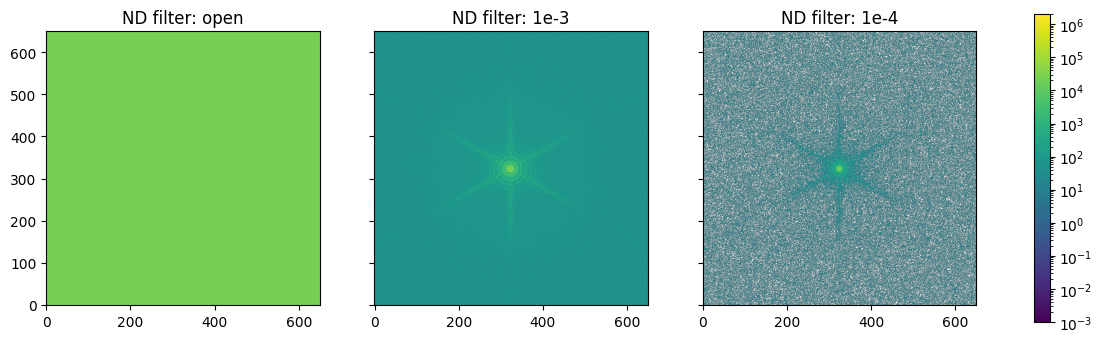

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 4))

im1 = ax1.imshow(hdu_open.data[700:1350, 700:1350], origin="lower", vmin=1e-3, vmax=2e6, norm="log")
ax1.set_title("ND filter: open")
ax2.imshow(hdu_OD3.data[700:1350, 700:1350], origin="lower", vmin=1e-3, vmax=2e6, norm="log")
ax2.set_title("ND filter: 1e-3")
ax3.imshow(hdu_OD4.data[700:1350, 700:1350], origin="lower", vmin=1e-3, vmax=2e6, norm="log")
ax3.set_title("ND filter: 1e-4")
plt.colorbar(im1, ax=(ax1, ax2, ax3));

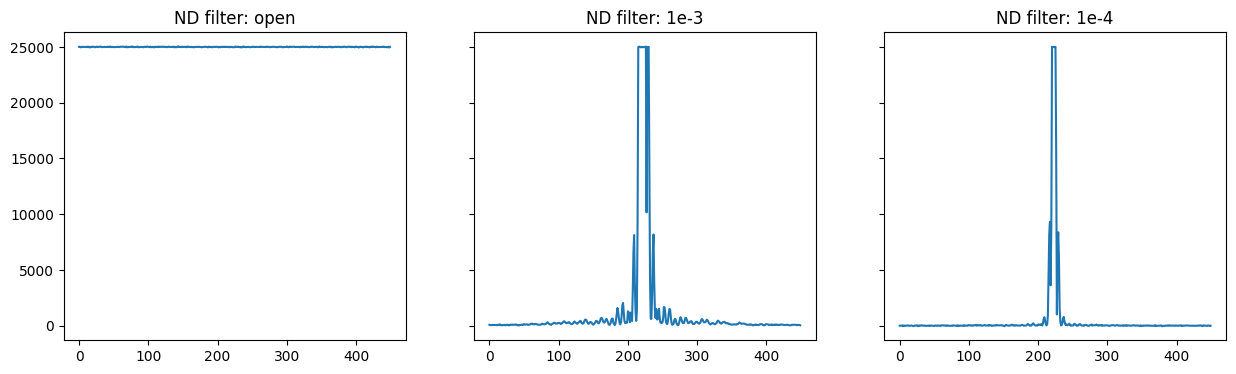

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 4))

ax1.plot(hdu_open.data[800:1250, 1024])
ax1.set_title("ND filter: open")
ax2.plot(hdu_OD3.data[800:1250, 1024])
ax2.set_title("ND filter: 1e-3")
ax3.plot(hdu_OD4.data[800:1250, 1024])
ax3.set_title("ND filter: 1e-4");

## Adding a custom filter to the filter wheel
A custom filter that is not in the default filter set can be added to the wheel using the method `add_filter`. A "filter" is an object of class `TERCurve` (or one of its subclasses) and the various methods for instantiating such an object can be used.

In [23]:
newfilter = sim.effects.ter_curves.TopHatFilterCurve(
    transmission=0.9, blue_cutoff=3.8, red_cutoff=3.9, 
    name="custom_tophat")
metis["filter_wheel"].add_filter(newfilter)
metis["filter_wheel"].filters.keys()

dict_keys(['open', 'Lp', 'short-L', 'L_spec', 'Mp', 'M_spec', 'Br_alpha', 'Br_alpha_ref', 'PAH_3.3', 'PAH_3.3_ref', 'CO_1-0_ice', 'CO_ref', 'H2O-ice', 'IB_4.05', 'HCI_L_short', 'HCI_L_long', 'HCI_M', 'custom_tophat'])

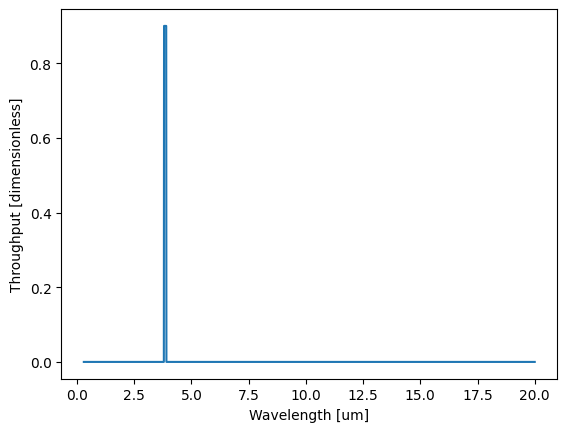

In [24]:
metis["filter_wheel"].change_filter("custom_tophat")
metis["filter_wheel"].current_filter.plot();